# STA130 HW 4 pre & post lecture


### chatbot link: https://chatgpt.com/share/66f6024a-319c-800e-b019-3a5853841e51
### chatbot session summary

### Summary of Interaction:

In this conversation, we covered the following topics related to bootstrapping and confidence intervals:

1. **Bootstrapping**:
   - You requested assistance in generating a **bootstrapped dataset**. We discussed how to randomly sample from a dataset with replacement to create a bootstrapped sample.
   - I provided code to generate bootstrapped datasets and calculate the mean of the samples.

2. **Bootstrapped Means Distribution**:
   - I extended the code to calculate the **distribution of bootstrapped means** across multiple iterations. The code was modified to store the mean of each bootstrapped sample and return a distribution of these means.

3. **95% Confidence Interval**:
   - You asked how to calculate a **95% confidence interval (CI)** using the bootstrapped means.
   - I introduced the **percentile method** for confidence intervals, which calculates the 2.5th and 97.5th percentiles of the bootstrapped means to define the 95% CI.
   - I also provided an explanation of **Standard Error of the Mean (SEM)** and **Standard Deviation (SD)** in relation to confidence intervals.

4. **Final Code**:
   - After iterating on your requests, we arrived at a final version of the code that computes the **bootstrapped means** and calculates the **95% confidence interval** using the percentile method, which is common in non-parametric statistics.

---

### Final Version of the Bootstrapping and 95% CI Code:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset (you can replace this with your actual dataset)
data = pd.DataFrame({
    'Feature1': np.random.normal(loc=0, scale=1, size=100),
    'Feature2': np.random.normal(loc=5, scale=2, size=100),
    'Feature3': np.random.normal(loc=10, scale=3, size=100)
})

# Function to generate a bootstrapped dataset
def generate_bootstrap_sample(data, n_samples=None):
    """
    Generate a bootstrapped dataset by sampling with replacement from the original dataset.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_samples (int): Number of samples in the bootstrapped dataset. 
                         If None, defaults to the size of the original dataset.
    
    Returns:
        pd.DataFrame: Bootstrapped dataset.
    """
    if n_samples is None:
        n_samples = len(data)
    
    # Sample with replacement from the original dataset
    bootstrapped_data = data.sample(n=n_samples, replace=True)
    
    return bootstrapped_data

# Function to calculate the distribution of means using bootstrapping
def bootstrap_mean_distribution(data, n_iterations=1000):
    """
    Generate the distribution of means from bootstrapped datasets.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_iterations (int): Number of bootstrap iterations.
    
    Returns:
        pd.DataFrame: A DataFrame containing the distribution of means for each feature.
    """
    means = []
    
    for _ in range(n_iterations):
        # Generate a bootstrapped sample
        bootstrapped_data = generate_bootstrap_sample(data)
        
        # Calculate the mean for each feature and store the result
        means.append(bootstrapped_data.mean())
    
    # Convert the list of means into a DataFrame
    means_df = pd.DataFrame(means)
    
    return means_df

# Function to calculate the bootstrapped 95% confidence interval using percentiles
def calculate_bootstrap_ci(bootstrapped_means, ci_percentile=95):
    """
    Calculate the bootstrapped confidence interval using the percentile method.
    
    Parameters:
        bootstrapped_means (pd.DataFrame): A DataFrame containing the means of the bootstrapped samples.
        ci_percentile (int): The confidence interval percentile (default is 95 for a 95% CI).
    
    Returns:
        pd.DataFrame: DataFrame containing the lower and upper bounds of the confidence interval for each feature.
    """
    lower_percentile = (100 - ci_percentile) / 2
    upper_percentile = 100 - lower_percentile
    
    ci_bounds = {}

    for column in bootstrapped_means.columns:
        lower_bound = np.percentile(bootstrapped_means[column], lower_percentile)
        upper_bound = np.percentile(bootstrapped_means[column], upper_percentile)
        
        # Store the lower and upper bounds in a dictionary
        ci_bounds[column] = {
            '95% CI Lower': lower_bound,
            '95% CI Upper': upper_bound
        }

    # Convert the CI bounds into a DataFrame
    ci_df = pd.DataFrame(ci_bounds).T
    return ci_df

# Generate the distribution of means using bootstrapping
n_iterations = 1000  # Number of bootstrap samples to generate
bootstrapped_means = bootstrap_mean_distribution(data, n_iterations=n_iterations)

# Calculate the bootstrapped 95% confidence interval
ci_percentile = 95  # We want a 95% confidence interval
bootstrap_ci = calculate_bootstrap_ci(bootstrapped_means, ci_percentile)

# Display the 95% confidence interval for each feature
print(bootstrap_ci)

# Plot the distribution of means for each feature
bootstrapped_means.plot(kind='density', subplots=True, layout=(3, 1), figsize=(8, 12), sharex=False)
plt.suptitle('Distribution of Bootstrapped Means with 95% CI')
plt.show()
```

### Key Points:
- **Bootstrapped Dataset**: Samples with replacement from the original data.
- **Bootstrapped Means**: Calculates the mean of each bootstrapped dataset.
- **95% Confidence Interval**: Uses the **percentile method** to calculate the 2.5th and 97.5th percentiles of the bootstrapped means, providing a non-parametric confidence interval.
- **Plots**: Visualize the distribution of the bootstrapped means for each feature.

This code provides a comprehensive solution to generate a bootstrapped dataset, calculate the distribution of means, and compute a 95% confidence interval using the bootstrapping approach.

Let me know if you need any more adjustments or clarifications for your assignment!

### 1. answer below
    
    The standard deviation measures how spread out the data is, focusing more on the sample itself. The standard error of the mean measures the how the mean would vary if we do the experienment several times, focusing more on the mean rather than the sample. 

### 2. procedures below
    
    (1) calculate the mean of the sample
    (2) calculate the standard error of the mean: SEM = SD / sqrt(N)
    (3) select the critical value based on the sample size: N >= 30 -> z-score, N < 30 -> t-distrubution
    (4) calculate the margin of error: ME = (critical value) * SEM
    (5) construct the confidence interval: (x_bar - ME, x_bar + ME)

### 3.  answers below

               Mean        SD       SEM  95% CI Lower  95% CI Upper
Feature1   0.043097  0.108678  0.003437      0.036361      0.049832
Feature2   5.156301  0.196257  0.006206      5.144137      5.168465
Feature3  10.186898  0.333776  0.010555     10.166210     10.207585


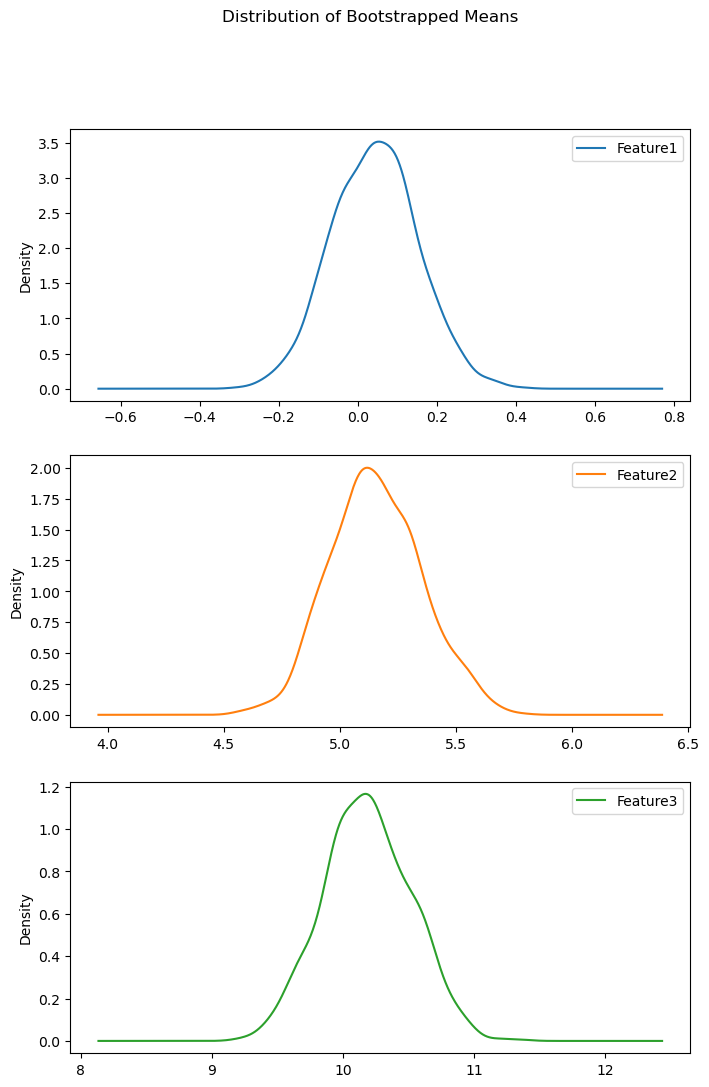

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset (you can replace this with your actual dataset)
data = pd.DataFrame({
    'Feature1': np.random.normal(loc=0, scale=1, size=100),
    'Feature2': np.random.normal(loc=5, scale=2, size=100),
    'Feature3': np.random.normal(loc=10, scale=3, size=100)
})

# Function to generate a bootstrapped dataset
def generate_bootstrap_sample(data, n_samples=None):
    """
    Generate a bootstrapped dataset by sampling with replacement from the original dataset.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_samples (int): Number of samples in the bootstrapped dataset. 
                         If None, defaults to the size of the original dataset.
    
    Returns:
        pd.DataFrame: Bootstrapped dataset.
    """
    if n_samples is None:
        n_samples = len(data)
    
    # Sample with replacement from the original dataset
    bootstrapped_data = data.sample(n=n_samples, replace=True)
    
    return bootstrapped_data

# Function to calculate the distribution of means using bootstrapping
def bootstrap_mean_distribution(data, n_iterations=1000):
    """
    Generate the distribution of means from bootstrapped datasets.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_iterations (int): Number of bootstrap iterations.
    
    Returns:
        pd.DataFrame: A DataFrame containing the distribution of means for each feature.
        np.array: A numpy array containing the distribution of the means for each feature
    """
    means = []
    
    for _ in range(n_iterations):
        # Generate a bootstrapped sample
        bootstrapped_data = generate_bootstrap_sample(data)
        
        # Calculate the mean for each feature and store the result
        means.append(bootstrapped_data.mean())
    
    # Convert the list of means into a DataFrame
    means_df = pd.DataFrame(means)
    means_np = np.array(means)
    
    return means_df, means_np

# Function to calculate the 95% confidence interval for the bootstrapped means
def calculate_95_ci(bootstrapped_means):
    """
    Calculate the 95% confidence interval (CI) using both SD and SEM.
    
    Parameters:
        bootstrapped_means (pd.DataFrame): A DataFrame containing the means of the bootstrapped samples.
    
    Returns:
        pd.DataFrame: DataFrame containing the mean, SD, SEM, and 95% CI (Lower, Upper) for each feature.
    """
    summary_stats = {}

    for column in bootstrapped_means.columns:
        mean_value = bootstrapped_means[column].mean()
        sd_value = bootstrapped_means[column].std()  # Standard deviation of bootstrapped means
        sem_value = sd_value / np.sqrt(len(bootstrapped_means))  # Standard error of the mean (SEM)
        
        # 95% confidence interval using SEM and critical value (1.96 for 95% CI)
        ci_lower = mean_value - 1.96 * sem_value
        ci_upper = mean_value + 1.96 * sem_value
        
        # Store the statistics in a dictionary
        summary_stats[column] = {
            'Mean': mean_value,
            'SD': sd_value,
            'SEM': sem_value,
            '95% CI Lower': ci_lower,
            '95% CI Upper': ci_upper
        }

    # Convert the summary statistics into a DataFrame
    summary_df = pd.DataFrame(summary_stats).T
    return summary_df

# Generate the distribution of means using bootstrapping
n_iterations = 1000  # Number of bootstrap samples to generate
bootstrapped_means, mean_np = bootstrap_mean_distribution(data, n_iterations=n_iterations)

# Calculate the 95% confidence interval using SD and SEM
summary_statistics = calculate_95_ci(bootstrapped_means)

# Display the summary statistics with 95% CI for each feature
print(summary_statistics)

# Plot the distribution of means for each feature
bootstrapped_means.plot(kind='density', subplots=True, layout=(3, 1), figsize=(8, 12), sharex=False)
plt.suptitle('Distribution of Bootstrapped Means')
plt.show()


    Above showing the confidence interval using SD and SME. 
    To find the 95% bootstrapped confidence interval, we take the interval that covers 95% of the bootstrapped means

In [26]:
print(np.quantile(mean_np, 0.025, axis=(0,)))
print(np.quantile(mean_np, 0.975, axis=(0,)))

[-0.16917859  4.80316677  9.54895599]
[ 0.25989503  5.56284787 10.84661719]


    Above showing the 95% confidence interval for each feature. where each column showing the lower and upper boundaries of each interval of each feature

### 4. code below(modifications shown as comments)

          95% CI Lower  95% CI Upper
Feature1     -0.275690      0.101985
Feature2      4.225322      5.044241
Feature3      9.799250     10.920390


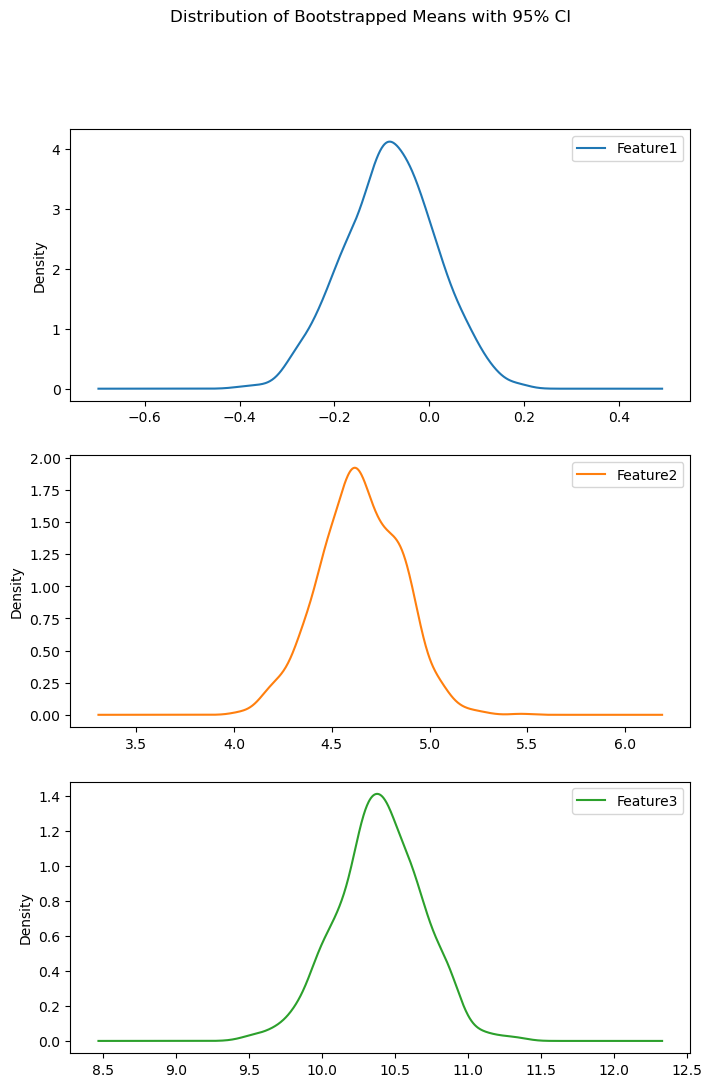

In [34]:
# the comments will explain how to modify the code so that it creates a bootstrapped interval for the median
# the change of variable names will not be mentioned

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Feature1': np.random.normal(loc=0, scale=1, size=100),
    'Feature2': np.random.normal(loc=5, scale=2, size=100),
    'Feature3': np.random.normal(loc=10, scale=3, size=100)
})

# this is the function that creates the bootstrapped sample, nothing to change here
def generate_bootstrap_sample(data, n_samples=None): 
    """
    Generate a bootstrapped dataset by sampling with replacement from the original dataset.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_samples (int): Number of samples in the bootstrapped dataset. 
                         If None, defaults to the size of the original dataset.
    
    Returns:
        pd.DataFrame: Bootstrapped dataset.
    """
    if n_samples is None:
        n_samples = len(data)
    

    bootstrapped_data = data.sample(n=n_samples, replace=True)
    
    return bootstrapped_data

# we will be modifying this function to calculate the median of the data
# the change of function name and variable names will not be mentioned
def bootstrap_mean_distribution(data, n_iterations=1000):
    """
    Generate the distribution of means from bootstrapped datasets.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_iterations (int): Number of bootstrap iterations.
    
    Returns:
        pd.DataFrame: A DataFrame containing the distribution of means for each feature.
    """
    means = []
    
    for _ in range(n_iterations):
        bootstrapped_data = generate_bootstrap_sample(data)
        
        # for this line, instead of finding the mean, we want to calculate the median
        # instead of appending bootstrapped_data.mean(), we append bootstrapped_data.median()
        means.append(bootstrapped_data.mean())
    
    means_df = pd.DataFrame(means)
    
    return means_df

# this function is for calculating the confidence interval, nothing to change here
def calculate_bootstrap_ci(bootstrapped_means, ci_percentile=95):
    """
    Calculate the bootstrapped confidence interval using the percentile method.
    
    Parameters:
        bootstrapped_means (pd.DataFrame): A DataFrame containing the means of the bootstrapped samples.
        ci_percentile (int): The confidence interval percentile (default is 95 for a 95% CI).
    
    Returns:
        pd.DataFrame: DataFrame containing the lower and upper bounds of the confidence interval for each feature.
    """
    lower_percentile = (100 - ci_percentile) / 2
    upper_percentile = 100 - lower_percentile
    
    ci_bounds = {}

    for column in bootstrapped_means.columns:
        lower_bound = np.percentile(bootstrapped_means[column], lower_percentile)
        upper_bound = np.percentile(bootstrapped_means[column], upper_percentile)
        
        ci_bounds[column] = {
            '95% CI Lower': lower_bound,
            '95% CI Upper': upper_bound
        }

    ci_df = pd.DataFrame(ci_bounds).T
    return ci_df

n_iterations = 1000
bootstrapped_means = bootstrap_mean_distribution(data, n_iterations=n_iterations)

ci_percentile = 95
bootstrap_ci = calculate_bootstrap_ci(bootstrapped_means, ci_percentile)

print(bootstrap_ci)

bootstrapped_means.plot(kind='density', subplots=True, layout=(3, 1), figsize=(8, 12), sharex=False)
plt.suptitle('Distribution of Bootstrapped Means with 95% CI')
plt.show()


          95% CI Lower  95% CI Upper
Feature1     -0.117287      0.411831
Feature2      4.206796      5.270481
Feature3      9.296366     10.850088


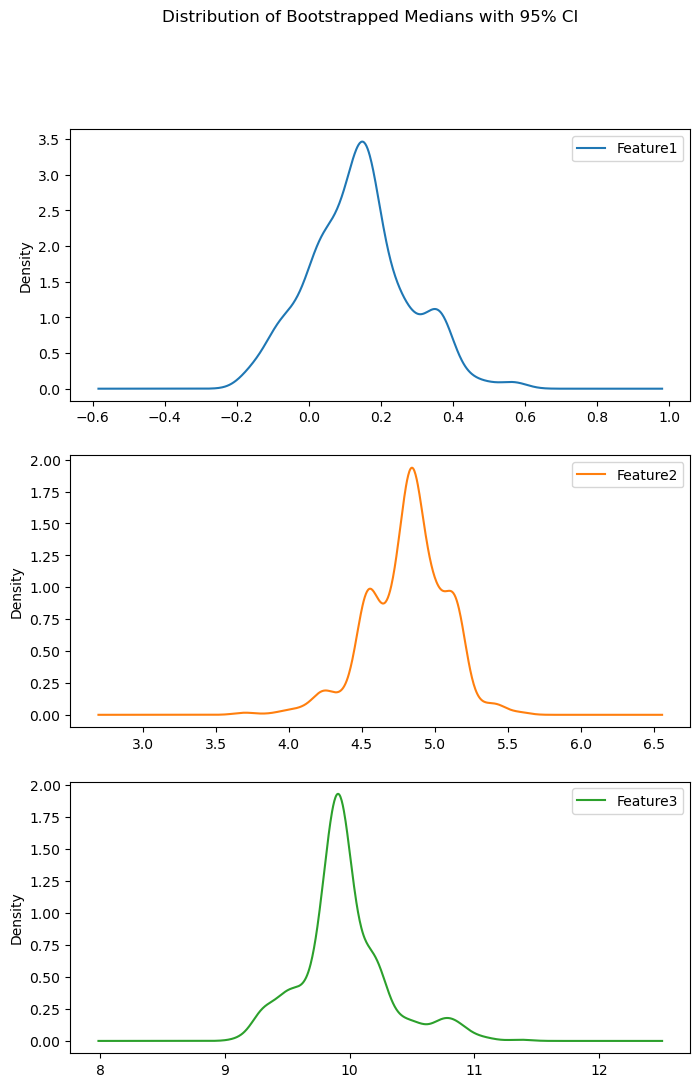

In [37]:
# modified version with variable names changed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Feature1': np.random.normal(loc=0, scale=1, size=100),
    'Feature2': np.random.normal(loc=5, scale=2, size=100),
    'Feature3': np.random.normal(loc=10, scale=3, size=100)
})

def generate_bootstrap_sample(data, n_samples=None): 
    """
    Generate a bootstrapped dataset by sampling with replacement from the original dataset.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_samples (int): Number of samples in the bootstrapped dataset. 
                         If None, defaults to the size of the original dataset.
    
    Returns:
        pd.DataFrame: Bootstrapped dataset.
    """
    if n_samples is None:
        n_samples = len(data)
    

    bootstrapped_data = data.sample(n=n_samples, replace=True)
    
    return bootstrapped_data

# we will be modifying this function to calculate the median of the data
# the change of function name and variable names will not be mentioned
def bootstrap_median_distribution(data, n_iterations=1000):
    """
    Generate the distribution of means from bootstrapped datasets.
    
    Parameters:
        data (pd.DataFrame): The original dataset.
        n_iterations (int): Number of bootstrap iterations.
    
    Returns:
        pd.DataFrame: A DataFrame containing the distribution of means for each feature.
    """
    medians = []
    
    for _ in range(n_iterations):
        bootstrapped_data = generate_bootstrap_sample(data)

        medians.append(bootstrapped_data.median())
    
    medians_df = pd.DataFrame(medians)
    
    return medians_df

# this function is for calculating the confidence interval, nothing to change here
def calculate_bootstrap_ci(bootstrapped_medians, ci_percentile=95):
    """
    Calculate the bootstrapped confidence interval using the percentile method.
    
    Parameters:
        bootstrapped_means (pd.DataFrame): A DataFrame containing the means of the bootstrapped samples.
        ci_percentile (int): The confidence interval percentile (default is 95 for a 95% CI).
    
    Returns:
        pd.DataFrame: DataFrame containing the lower and upper bounds of the confidence interval for each feature.
    """
    lower_percentile = (100 - ci_percentile) / 2
    upper_percentile = 100 - lower_percentile
    
    ci_bounds = {}

    for column in bootstrapped_medians.columns:
        lower_bound = np.percentile(bootstrapped_medians[column], lower_percentile)
        upper_bound = np.percentile(bootstrapped_medians[column], upper_percentile)
        
        ci_bounds[column] = {
            '95% CI Lower': lower_bound,
            '95% CI Upper': upper_bound
        }

    ci_df = pd.DataFrame(ci_bounds).T
    return ci_df

n_iterations = 1000
bootstrapped_medians = bootstrap_median_distribution(data, n_iterations=n_iterations)

ci_percentile = 95
bootstrap_ci = calculate_bootstrap_ci(bootstrapped_medians, ci_percentile)

print(bootstrap_ci)

bootstrapped_medians.plot(kind='density', subplots=True, layout=(3, 1), figsize=(8, 12), sharex=False)
plt.suptitle('Distribution of Bootstrapped Medians with 95% CI')
plt.show()


### chatbot link: https://chatgpt.com/share/66fb2b24-9fe0-800e-877d-e0cdc0e2948a
### chatbot session summary

### Assignment: Understanding Population Parameters, Sample Statistics, and Confidence Intervals

---

**1. Definitions**:
   - **Population Parameter**: A fixed value describing a characteristic of the entire population (e.g., population mean (μ), population proportion (P)). It is usually unknown because collecting data from the entire population is impractical.
   - **Sample Statistic**: A value calculated from a subset of the population (sample) to estimate the population parameter. Examples include sample mean (x̄) and sample proportion (p̂). Sample statistics vary across samples.

---

**2. Difference Between Population Parameters and Sample Statistics**:
   - **Scope**: A population parameter describes the entire population, while a sample statistic describes a sample from the population.
   - **Known vs. Unknown**: Population parameters are generally unknown, while sample statistics are known and calculated from data.
   - **Notation**: Population parameters use Greek letters (e.g., μ, σ), and sample statistics use Latin letters (e.g., x̄, s).

---

**3. Importance in Confidence Intervals**:
   - **Purpose of Confidence Intervals**: Confidence intervals are used to estimate the unknown population parameter based on the sample statistic.
   - **Formula**: Confidence intervals are typically of the form:
     \[
     \text{Sample Statistic} \pm \left(\text{Critical Value} \times \text{Standard Error}\right)
     \]
     This provides a range of plausible values for the population parameter based on the sample statistic.
   - **Generalization**: A confidence interval does not reflect uncertainty about the sample statistic (which is known) but estimates the population parameter, allowing us to infer information about the entire population from a sample.
   - **Interpretation**: For example, a 95% confidence interval means that if the sampling were repeated many times, 95% of those intervals would capture the true population parameter.

---

**4. Conclusion**:
   - It is essential to distinguish between population parameters and sample statistics when constructing confidence intervals. The sample statistic serves as an estimate of the unknown population parameter, and the confidence interval reflects the uncertainty in this estimate.

---

**Key Terms**: Population Parameter, Sample Statistic, Confidence Interval, Critical Value, Standard Error



### 5. answer below
    
    The confidence interval is made by sample statistics and used for estimate the population parameter. It measures the variability of the population parameter. We need to distinghish them to understand the purpose of confidence intervals.

### 6. Q&A below
    
    Q1. What is the process of bootstrapping?
    A1. It's like picking balls from a bag. Say you have a bag with n balls. You pick a ball from the bag, record its value, and put it back. You repeat this n times. After that, you will get a new sequence of numbers. You can do this as many times as you want. In a statistical environment, the original sample is the bag of balls. You sample from the original sample just like picking the balls. Eventually, you will get new datasets that is sampled from your original sample. 
    
    Q2. What is the main purpose of bootstrapping?
    A2. It is a way to create a dataset to measure the population when the population is unknown or impossible to measure directly. 
    
    Q3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
    A3. I first create a bootstrapped sampling distribution of the sample mean. Then, I calculate the, say 95%, confidence interval. This tells me that if I take more samples and calculate the confidence interval, 95% of them will capture the population mean. So, I can make my conclusion of my guess based on this information. 

### 7. answer below

    The sample statistic itself is not zero doesn't mean that the population mean isn't zero. In this context, if the population mean is zero, then the drug will have no effect on people. The confidence interval is a tool to measure the variability of the population mean. Since zero is covered, it is likely that the population mean is zero. If we want to reject the null hypothesis, the confidence interval must not include zero.

### 8. analysis

In [4]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("./vaccine dataset.csv")
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


In [7]:
df["HealthScoreDifference"] = df["InitialHealthScore"] - df["FinalHealthScore"]
df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreDifference
0,1,45,M,84,86,-2
1,2,34,F,78,86,-8
2,3,29,M,83,80,3
3,4,52,F,81,86,-5
4,5,37,M,81,84,-3
5,6,41,F,80,86,-6
6,7,33,M,79,86,-7
7,8,48,F,85,82,3
8,9,26,M,76,83,-7
9,10,39,F,83,84,-1


In [32]:
import numpy as np

np.random.seed(114514)
n = 10
means = []
number_of_simulations = 1000
    
for _ in range(number_of_simulations):
    bootstrapped_sample = df.sample(n=n, replace=True)
    means.append(bootstrapped_sample["HealthScoreDifference"].mean())

means = pd.DataFrame(means)
means = means.rename({0: "HealthScoreDifference"}, axis=1)
means

,HealthScoreDifference
0,-4.5
1,-2.6
2,-1.9
3,-2.2
4,-1.1
...,...
995,-5.2
996,-3.7
997,-4.1
998,-2.6


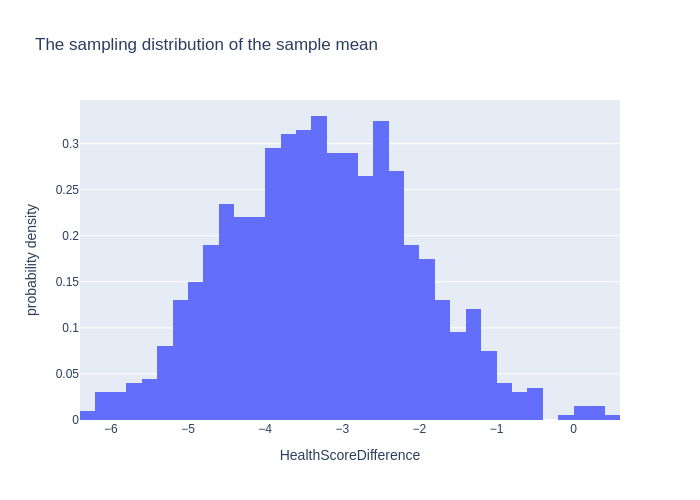

In [33]:
title1 = "The sampling distribution of the sample mean"
fig = px.histogram(means, title=title1, x="HealthScoreDifference", 
                   histnorm='probability density')    
fig.show(renderer="png")

In [40]:
print(means.quantile(0.025),"\n", means.quantile(0.975))

HealthScoreDifference   -5.6
Name: 0.025, dtype: float64 
 HealthScoreDifference   -1.0
Name: 0.975, dtype: float64


The 95% confidence interval is (-5.6, -1), where it doesn't include 0. We have a 95% confident that the average of the population lies in the interval, where the vaccine has a negitive impact on people. The drug maker should create new method of making vaccines to make people become healthier after taking the vaccine.

### 9. yes